<a href="https://colab.research.google.com/github/nguyenthanh222/phantichdulieu/blob/main/trafficsign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

%matplotlib inline

In [3]:
data_dir = '/content/gdrive/My Drive/My drive/Meta'
train_path = '/content/gdrive/My Drive/My drive/Train'
test_path = '/content/gdrive/My Drive/My drive/'
IMG_HEIGHT = 30
IMG_WIDTH = 30


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES 

43

In [6]:
BATCH_SIZE = 128 
NUM_CLASSES = 8   
EPOCHS = 15      
INPUT_SHAPE = (64,64,1) # Đồng bộ các ảnh về kích cỡ 64 x 64 và kênh màu Gray  

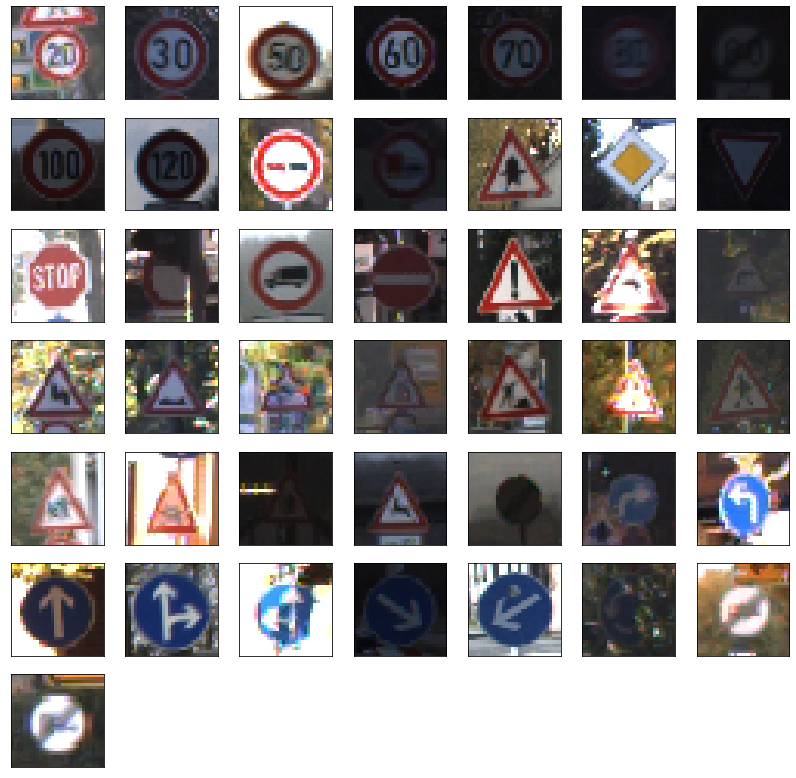

In [7]:
#Hình dung tất cả các dấu hiệu khác nhau
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(14,14))
index = 0
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
plt.show()
    

In [8]:
def load_data(data_dir):
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    
    return images, labels

In [9]:
images, labels = load_data(train_path)

# Mã hóa  các nhãn
labels = to_categorical(labels)

# Tách tập dữ liệu thành tập Train và tập Test
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.4)

In [11]:
model = Sequential()

# Lớp kết hợp đầu tiên
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Lớp chuyển đổi thứ hai
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Lớp kết hợp thứ ba
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 6, 6, 64)         

In [12]:

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 6, 6, 64)         

In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [14]:
#huấn luyện mô hình 
EPOCHS = 30
history = model.fit(x_train, 
                    y_train,
                    validation_data = (x_test, y_test), 
                    epochs=EPOCHS, 
                    steps_per_epoch=60
                   )

Epoch 1/30
60/60 [==============================] - 30s 488ms/step - loss: 6.5907 - accuracy: 0.0448 - val_loss: 3.6529 - val_accuracy: 0.0912
Epoch 2/30
60/60 [==============================] - 29s 487ms/step - loss: 3.4291 - accuracy: 0.1212 - val_loss: 3.1380 - val_accuracy: 0.2445
Epoch 3/30
60/60 [==============================] - 29s 486ms/step - loss: 2.6920 - accuracy: 0.2890 - val_loss: 2.1872 - val_accuracy: 0.4123
Epoch 4/30
60/60 [==============================] - 29s 488ms/step - loss: 2.0137 - accuracy: 0.4304 - val_loss: 1.6364 - val_accuracy: 0.5349
Epoch 5/30
60/60 [==============================] - 29s 490ms/step - loss: 1.6373 - accuracy: 0.5048 - val_loss: 1.3163 - val_accuracy: 0.6010
Epoch 6/30
60/60 [==============================] - 29s 489ms/step - loss: 1.3477 - accuracy: 0.5866 - val_loss: 1.0559 - val_accuracy: 0.6834
Epoch 7/30
60/60 [==============================] - 29s 486ms/step - loss: 1.0989 - accuracy: 0.6620 - val_loss: 0.8006 - val_accuracy: 0.7776

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)

print('test set accuracy: ', accuracy * 100)

491/491 [==============================] - 7s 14ms/step - loss: 0.0747 - accuracy: 0.9844
test set accuracy:  98.44427704811096


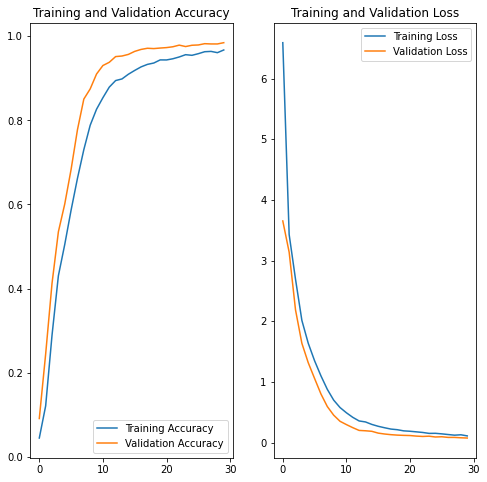

In [16]:
#Sử dụng matplotlib để vẽ biểu đồ tương quan giữa độ chính xác 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
#dự đoán hình ảnh 
from sklearn.metrics import accuracy_score
import pandas as pd

Y_test = pd.read_csv(test_path + 'Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

output = list()
for img in test_images:
    image = load_img(os.path.join(test_path, img), target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)
pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

Test Data accuracy:  93.93507521773556


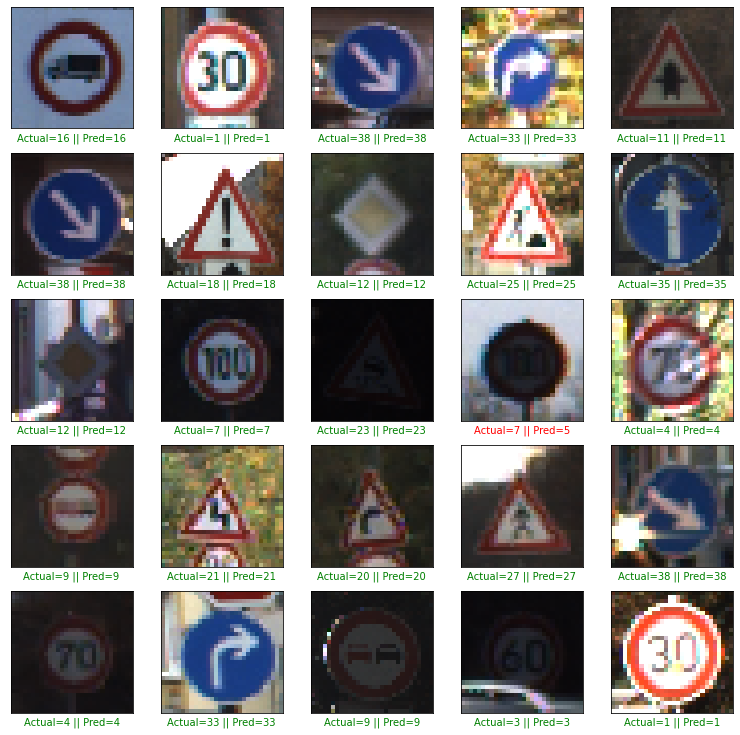

In [ ]:
plt.figure(figsize = (13, 13))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [ ]:
model.save('model-1.h5')